<a href="https://colab.research.google.com/github/prievarag/Employee-Attrition/blob/main/Employee_attrition_PG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Employee attrition prediction

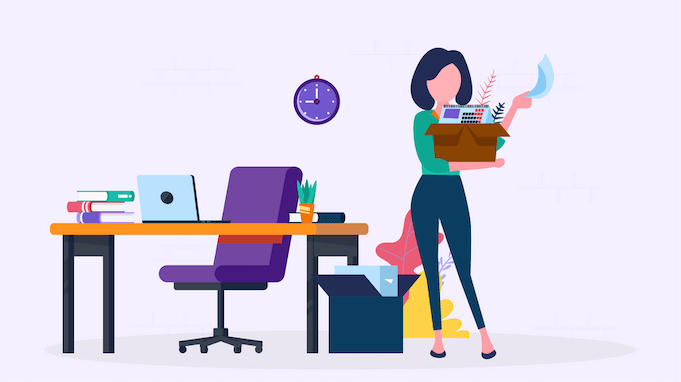

In my current workplace - food industry - one of my first tasks was to analyze employee turnover. I created lots of tables and graphs, and we drew several conclusions from that analysis.

At the time, and ever since, this question was of central importance.

Now I have a dataset from Kaggle, I will analyze it and predict whether an employee will leave the company in the future or not.

In this dataset we have several features as columns relevant to the investigation of labor turnover:
*   Education : The highest level of formal education obtained by the employee
*   JoiningYear : Year of joining the company
*   City : Job Location
*   PaymentTier : [1:3] -> 1 means better payment
*   Age : Age of the employee
*   Gender : Gender of the employee
*   EverBenched : Ever kept out of project for more than one month
*   ExperienceInCurrentDomain : Experience in current field
*   LeaveOrNot : Whether the employee leaves the company in next 2 years




In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Employee.csv")
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


In [4]:
#let's see how many data we have
df.shape

(4653, 9)

In [5]:
df.duplicated().sum()

1889

As we see the features, there is no reason to remove duplicates because they can be different employees.

In [6]:
df.dtypes

Education                    object
JoiningYear                   int64
City                         object
PaymentTier                   int64
Age                           int64
Gender                       object
EverBenched                  object
ExperienceInCurrentDomain     int64
LeaveOrNot                    int64
dtype: object

In [7]:
df.select_dtypes(include="object").nunique()

Education      3
City           3
Gender         2
EverBenched    2
dtype: int64

So we have 3 education level, 3 city, 2 gender and 2 of the category EverBenched.

In [8]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [9]:
df.columns

Index(['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot'],
      dtype='object')

## Data Visualization
We can see better the correlation between feature and target.

<Axes: xlabel='Gender', ylabel='count'>

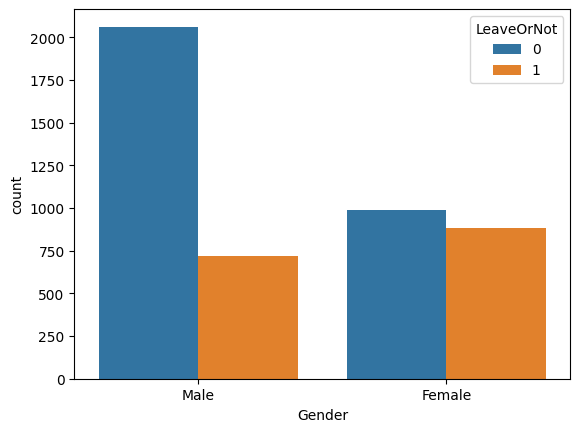

In [10]:
sns.countplot(data = df, x="Gender", hue="LeaveOrNot")

<Axes: xlabel='City', ylabel='count'>

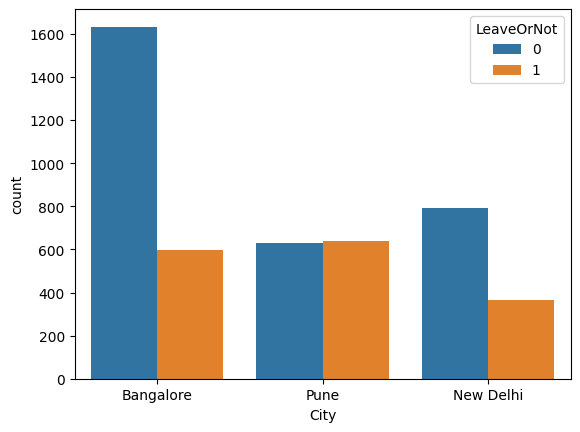

In [11]:
sns.countplot(data = df, x="City", hue="LeaveOrNot")

<Axes: xlabel='JoiningYear', ylabel='count'>

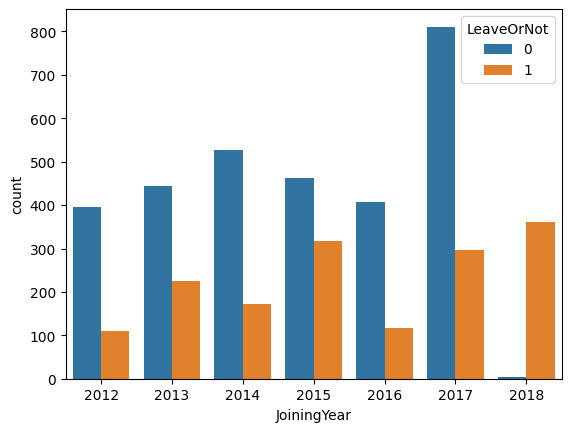

In [12]:
sns.countplot(data = df, x="JoiningYear", hue="LeaveOrNot")

<Axes: xlabel='EverBenched', ylabel='count'>

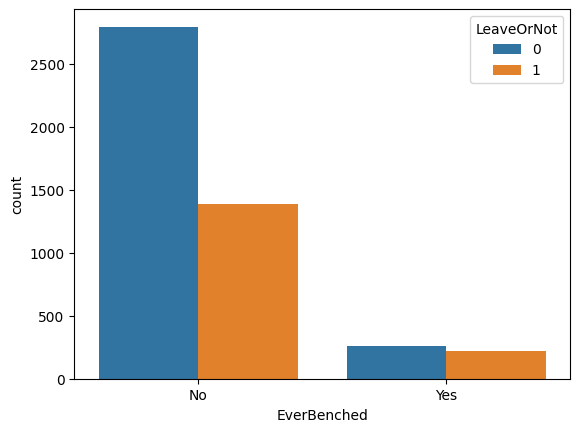

In [13]:
sns.countplot(data = df, x="EverBenched", hue="LeaveOrNot")

<Axes: xlabel='ExperienceInCurrentDomain', ylabel='count'>

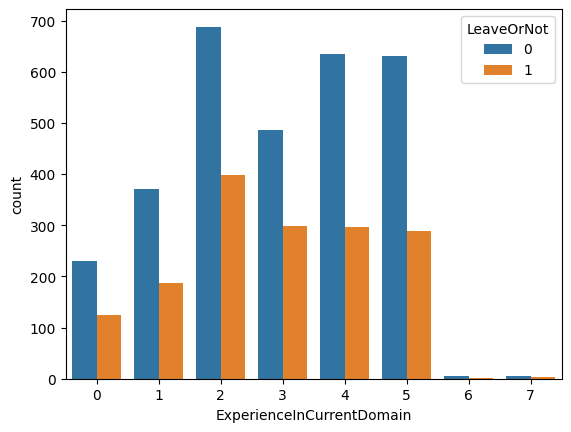

In [14]:
sns.countplot(data = df, x="ExperienceInCurrentDomain", hue="LeaveOrNot")

As we can see, about 50% leaves the company in every category. The company has only a few employee with 6 or 7 years of experience. Personally I think it is useful to keep employees with several years of experience because their replacement is more difficult to solve.

In [15]:
df_gender = df.Gender.value_counts()

<Axes: ylabel='Gender'>

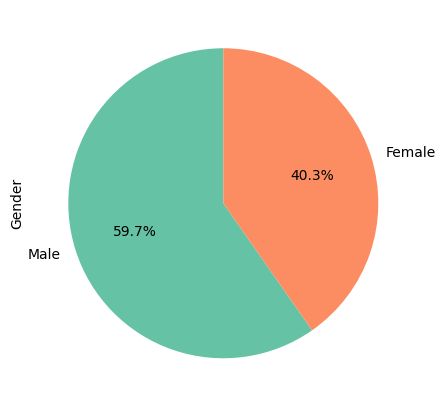

In [16]:
df_gender.plot(kind="pie",
               figsize = (5, 6),      #size of the graph
               autopct = '%1.1f%%',   #add data in percentages
               startangle = 90,       #rotation starting position
               colors=sns.color_palette('Set2'),
               #shadow = True          #maybe not a good idea
)

##Data Preprocessing

In [17]:
#Checking null values
df.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64